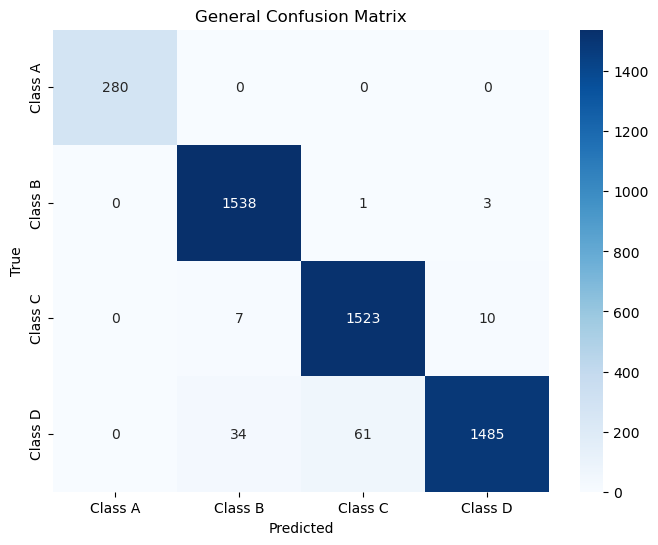

In [3]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the results directory
results_dir = '../results/[CWRU Load Division] From ImageNet Weights'

# Define the mapping from class indices to class names
class_mapping = {
    0: 'Class A',
    1: 'Class B',
    2: 'Class C',
    3: "Class D"
}

# Initialize lists to store all predictions and true labels
all_preds = []
all_true = []

# Iterate over each fold
fold_dirs = sorted([d for d in os.listdir(results_dir) if d.startswith('fold')])
for fold_dir in fold_dirs:
    fold_path = os.path.join(results_dir, fold_dir)
    preds_true_file = os.path.join(fold_path, 'preds_true.csv')
    
    # Read the predictions and true labels
    df = pd.read_csv(preds_true_file)
    preds = df['preds']
    true = df['true']
    
    # Append to the overall lists
    all_preds.extend(preds)
    all_true.extend(true)
    
    # Compute the confusion matrix for this fold
    #cm = confusion_matrix(true, preds)
    
    # Plot the confusion matrix for this fold
    #plt.figure(figsize=(8, 6))
    #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                #xticklabels=class_mapping.values(), 
                #yticklabels=class_mapping.values())
    #plt.title(f'Confusion Matrix for {fold_dir}')
    #plt.xlabel('Predicted')
    #plt.ylabel('True')
    #plt.show()

# Compute the general confusion matrix across all folds
general_cm = confusion_matrix(all_true, all_preds)

# Plot the general confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(general_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_mapping.values(), 
            yticklabels=class_mapping.values())
plt.title('General Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

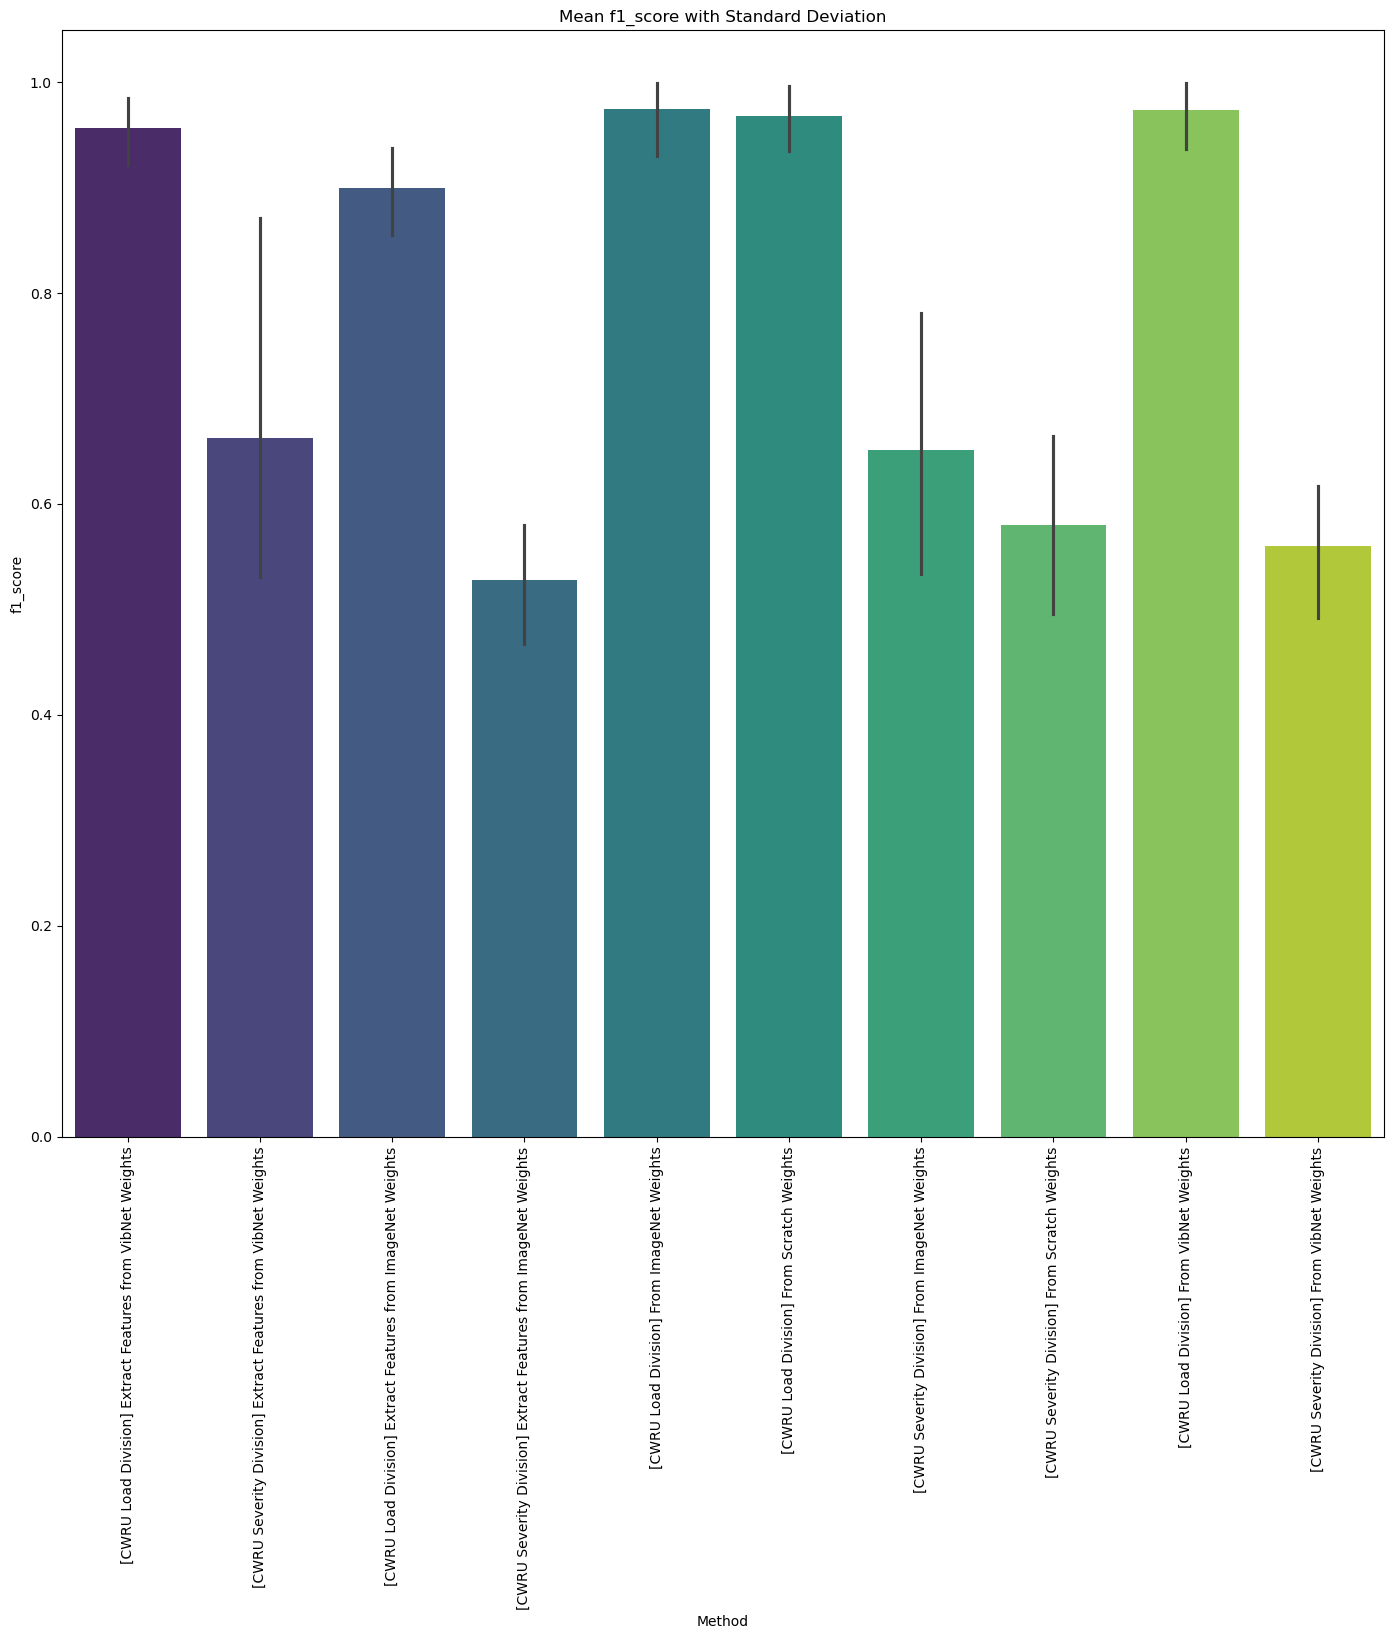

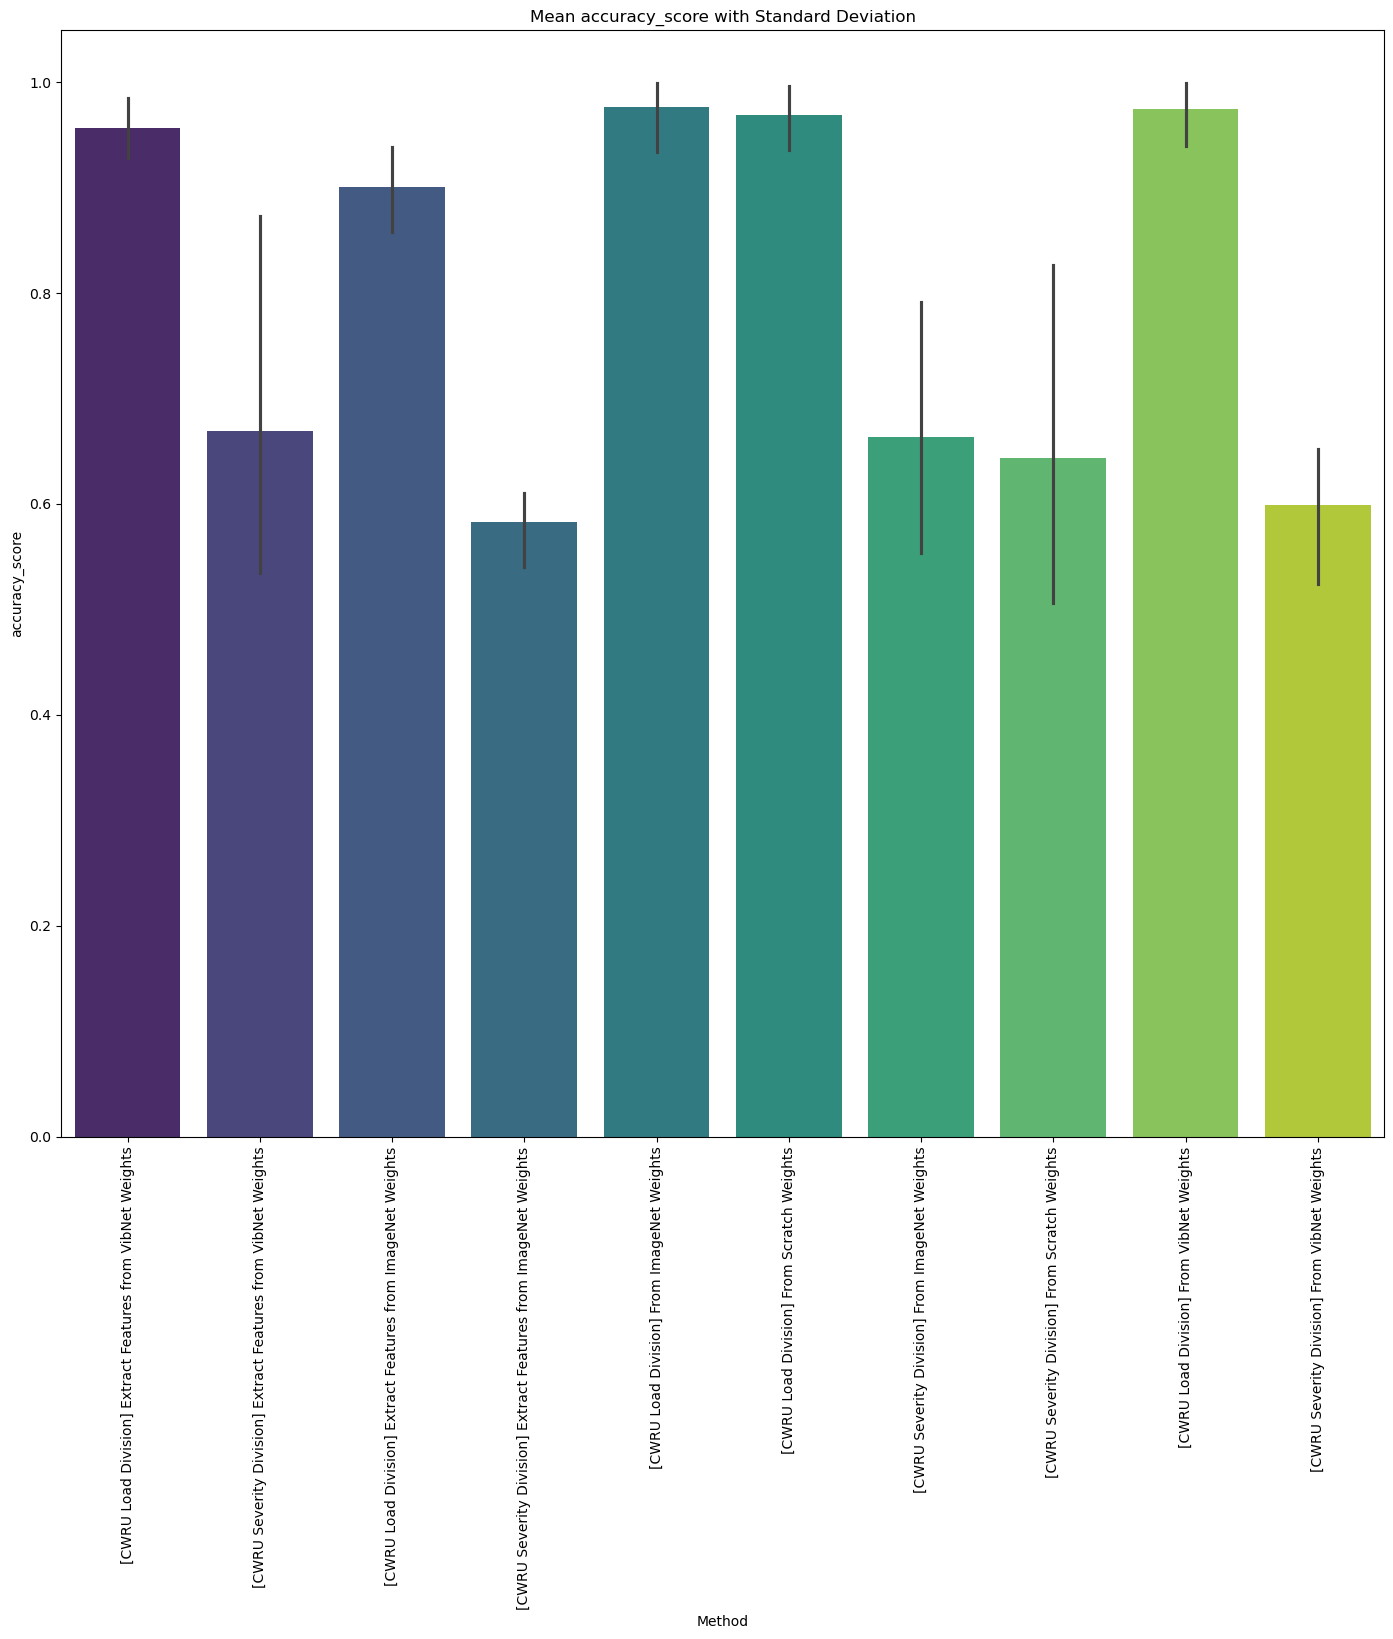

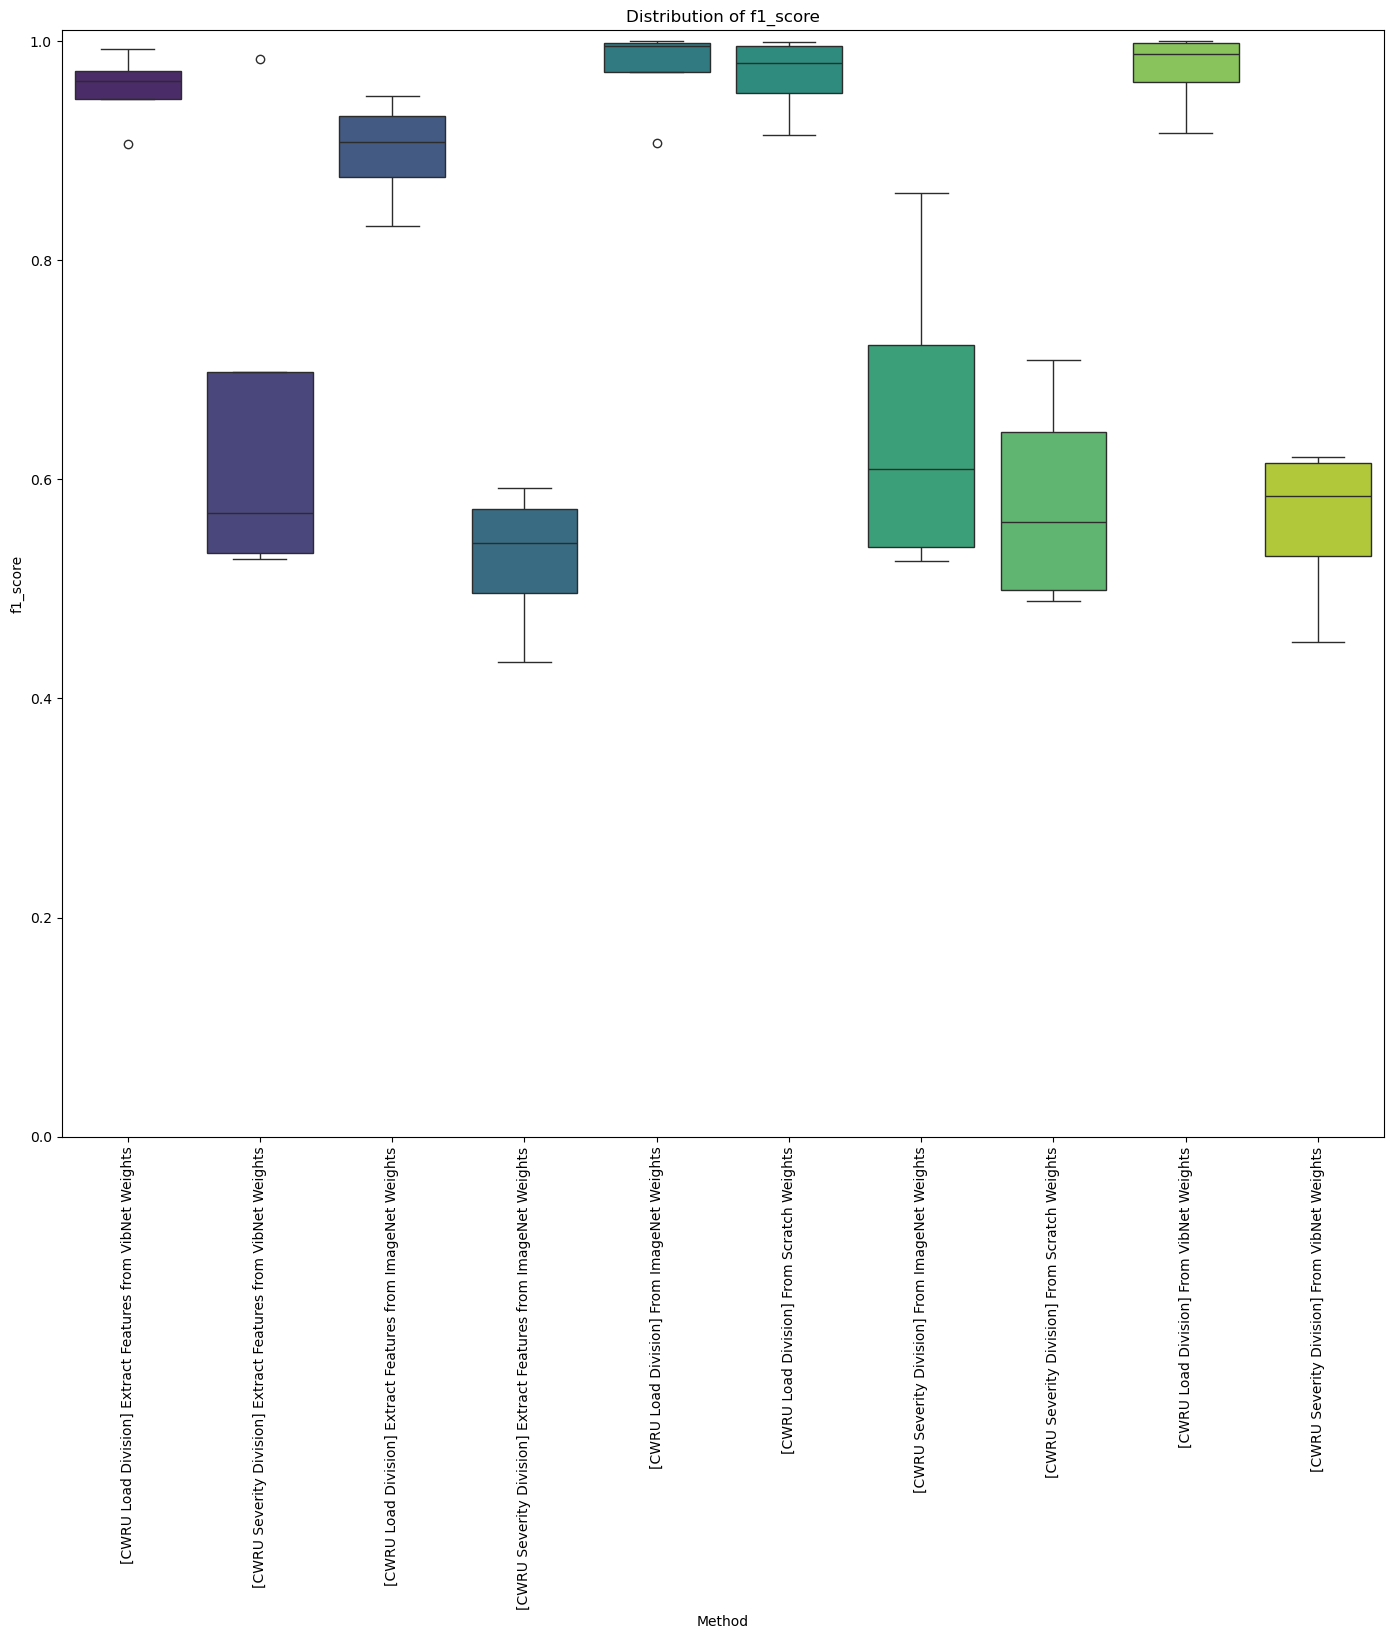

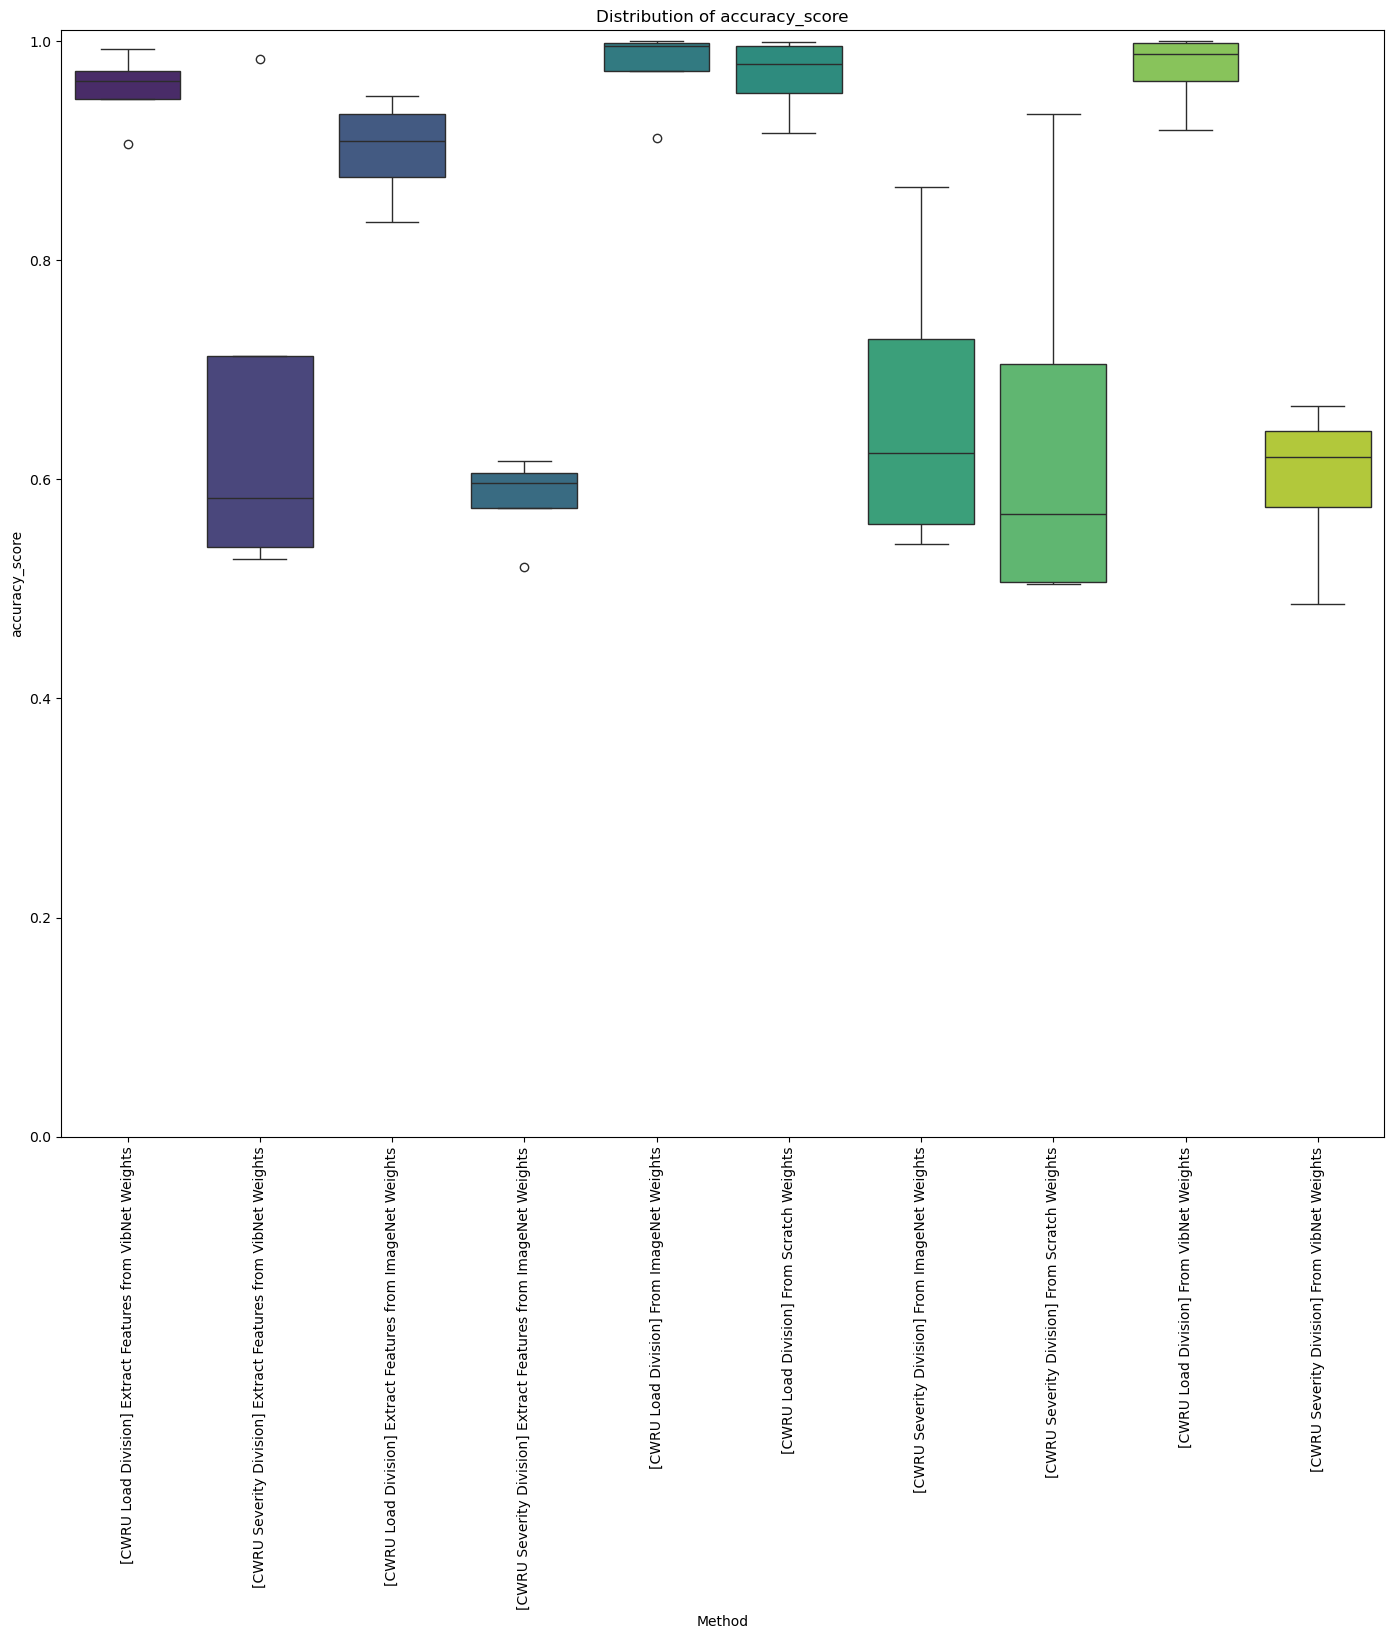

/tmp/ipykernel_748882/1336151162.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append({
/tmp/ipykernel_748882/1336151162.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append({
/tmp/ipykernel_748882/1336151162.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append({
/tmp/ipykernel_748882/1336151162.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append({
/tmp/ipykernel_748882/1336151162.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_dir = '../results'

# Define the metrics to analyze
metrics = ['f1_score', 'accuracy_score']

# Initialize a dictionary to store metrics for each method
method_metrics = {}

# Iterate over each method folder
method_folders = [d for d in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, d))]
for method in method_folders:
    method_path = os.path.join(results_dir, method)
    
    # Initialize a list to store metrics for all folds of this method
    method_metrics[method] = {metric: [] for metric in metrics}
    
    # Iterate over each fold in the method folder
    fold_dirs = sorted([d for d in os.listdir(method_path) if d.startswith('fold')])
    for fold_dir in fold_dirs:
        fold_path = os.path.join(method_path, fold_dir)
        test_results_file = os.path.join(fold_path, 'test_results.csv')
        
        # Read the test results for this fold
        df = pd.read_csv(test_results_file)
        
        # Append metrics to the method's list
        for metric in metrics:
            method_metrics[method][metric].append(df[metric].values[0])

# Convert the metrics into a DataFrame for easier plotting
data = []
for method, metrics_dict in method_metrics.items():
    for metric, values in metrics_dict.items():
        for value in values:
            data.append({'Method': method, 'Metric': metric, 'Value': value})
df = pd.DataFrame(data)

# Bar Plot: Mean of each metric for each method (one chart at a time)
for metric in metrics:
    plt.figure(figsize=(16, 12))
    sns.barplot(data=df[df['Metric'] == metric], x='Method', y='Value', palette='viridis', hue='Method')
    plt.title(f'Mean {metric} with Standard Deviation')
    plt.xlabel('Method')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.show()

# Box Plot: Distribution of each metric for each method (one chart at a time)
for metric in metrics:
    plt.figure(figsize=(16, 12))
    sns.boxplot(data=df[df['Metric'] == metric], x='Method', y='Value', palette='viridis', hue='Method')
    plt.title(f'Distribution of {metric}')
    plt.xlabel('Method')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.ylim(0, 1.01)
    plt.xticks(rotation=90)
    plt.show()

# Create a summary table for each method
summary_table = pd.DataFrame(columns=['Method', 'Metric', 'Mean', 'Std'])

for method in method_metrics:
    for metric in metrics:
        mean_value = pd.Series(method_metrics[method][metric]).mean()
        std_value = pd.Series(method_metrics[method][metric]).std()
        summary_table = summary_table.append({
            'Method': method,
            'Metric': metric,
            'Mean': mean_value,
            'Std': std_value
        }, ignore_index=True)

# Pivot the table for better readability
summary_table_pivot = summary_table.pivot(index='Method', columns='Metric', values=['Mean', 'Std'])

In [2]:
# Sort the pivoted table by the mean of 'accuracy_score'
metric_to_sort_by = 'accuracy_score'
summary_table_pivot_sorted = summary_table_pivot.sort_values(by=('Mean', metric_to_sort_by), ascending=False)

# Display the sorted table
summary_table_pivot_sorted

Mean            \
Metric                                             accuracy_score  f1_score   
Method                                                                        
[CWRU Load Division] From ImageNet Weights               0.975840  0.974629   
[CWRU Load Division] From VibNet Weights                 0.973992  0.973273   
[CWRU Load Division] From Scratch Weights                0.968421  0.968112   
[CWRU Load Division] Extract Features from VibN...       0.956645  0.956600   
[CWRU Load Division] Extract Features from Imag...       0.900387  0.899434   
[CWRU Severity Division] Extract Features from ...       0.668832  0.662116   
[CWRU Severity Division] From ImageNet Weights           0.663825  0.651190   
[CWRU Severity Division] From Scratch Weights            0.643539  0.580042   
[CWRU Severity Division] From VibNet Weights             0.598528  0.560154   
[CWRU Severity Division] Extract Features from ...       0.582629  0.527476   

                                                              Std            
Metric                                             accuracy_score  f1_score  
Method                                                                       
[CWRU Load Division] From ImageNet Weights               0.042970  0.045340  
[CWRU Load Division] From VibNet Weights                 0.037866  0.039357  
[CWRU Load Division] From Scratch Weights                0.038155  0.038880  
[CWRU Load Division] Extract Features from VibN...       0.036264  0.036295  
[CWRU Load Division] Extract Features from Imag...       0.050551  0.051433  
[CWRU Severity Division] Extract Features from ...       0.213858  0.216864  
[CWRU Severity Division] From ImageNet Weights           0.148606  0.155339  
[CWRU Severity Division] From Scratch Weights            0.201752  0.104260  
[CWRU Severity Division] From VibNet Weights             0.079062  0.077801  
[CWRU Severity Division] Extract Features from ...       0.043109  0.070013

In [4]:
filtered_table = summary_table_pivot_sorted[summary_table_pivot_sorted.index.str.startswith('[CWRU Load Division]')]

# Display the filtered table
filtered_table

Mean            \
Metric                                             accuracy_score  f1_score   
Method                                                                        
[CWRU Load Division] From ImageNet Weights               0.975840  0.974629   
[CWRU Load Division] From VibNet Weights                 0.973992  0.973273   
[CWRU Load Division] From Scratch Weights                0.968421  0.968112   
[CWRU Load Division] Extract Features from VibN...       0.956645  0.956600   
[CWRU Load Division] Extract Features from Imag...       0.900387  0.899434   

                                                              Std            
Metric                                             accuracy_score  f1_score  
Method                                                                       
[CWRU Load Division] From ImageNet Weights               0.042970  0.045340  
[CWRU Load Division] From VibNet Weights                 0.037866  0.039357  
[CWRU Load Division] From Scratch Weights                0.038155  0.038880  
[CWRU Load Division] Extract Features from VibN...       0.036264  0.036295  
[CWRU Load Division] Extract Features from Imag...       0.050551  0.051433

In [5]:
filtered_table = summary_table_pivot_sorted[summary_table_pivot_sorted.index.str.startswith('[CWRU Severity Division]')]

# Display the filtered table
filtered_table

Mean            \
Metric                                             accuracy_score  f1_score   
Method                                                                        
[CWRU Severity Division] Extract Features from ...       0.668832  0.662116   
[CWRU Severity Division] From ImageNet Weights           0.663825  0.651190   
[CWRU Severity Division] From Scratch Weights            0.643539  0.580042   
[CWRU Severity Division] From VibNet Weights             0.598528  0.560154   
[CWRU Severity Division] Extract Features from ...       0.582629  0.527476   

                                                              Std            
Metric                                             accuracy_score  f1_score  
Method                                                                       
[CWRU Severity Division] Extract Features from ...       0.213858  0.216864  
[CWRU Severity Division] From ImageNet Weights           0.148606  0.155339  
[CWRU Severity Division] From Scratch Weights            0.201752  0.104260  
[CWRU Severity Division] From VibNet Weights             0.079062  0.077801  
[CWRU Severity Division] Extract Features from ...       0.043109  0.070013